## Text Preprocessing
텍스트는 전처리가 매우 중요하다. -> 특징을 찾는 거 <br>
NLP 기반, 딥러닝은 언제가 실패함..  <br>
+ NLP : 텍스트 처리를 하면 검색 온라인 광고, 자동번역, 감정분석,음성인식, 맞춤법 검사
    + 담화 분석이 제일 안됨. 대화가 매끄럽지가 않음
    + 의미 분석을 대체해서 word 임베딩이 나온것.
    + 형태소 분석을 통해 토큰 분리, 어간추출, 품사 부착, 색인, 벡터화
    + 포털스 알고리즘

lemmatization : 어근 추출 <br>
Stemming : 어간 추출, 토큰 분리

형태소 분석 -> 구문 분석 /문자의 생김->(응용) 의미 분석 ->(응용) 담론분석 : 문단과 문단 분석
<br>
backofword model ? 워낙vector <br>
온톨로지 <br>
워드 임베딩

1. 문장 : 완결된 내용을 나타내는 최소 단위
2. 문장은 구와 절로 이루어져있음.
3. 문단 : 문장이 여러개
4. 담화 : 문단이 여러개
5. 어절 : 문장을 구성하는 단위 (띄어쓰기로 구분)
6. 단어 : 어절을 구성하는 요소 = 방바닥을 -> 방바닥 + 을
7. 형태소 : 의미를 가진 문법의 최소 단위 = 방(실질, 자립) + 바닥(실질, 자립) + 을(형식, 의존)
8. 단일어, 복합어 (합성어(어근,어근), 파생어(접두사,어근))

### KoNLPy, NLTK (파이썬 패키지)

#### NLTK : NLP 관련 패키지 (한국어 지원 안함)

In [2]:
import nltk

비정형 데이터 input -> sentence splitting -> Tokenizing -> part of speech(pos) tagging

##### sent_tokenize : sentence splitting 해줌

In [3]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
import sqlite3

conn = sqlite3.connect("nnnn.db")
cur = conn.cursor()

In [113]:
cur.execute("""
SELECT content FROM table2 ORDER BY id ASC 
""")
corpus = [_[0] for _ in cur.fetchall()]

In [114]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())

(1391, 310, 19)

In [28]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0]))

1

In [29]:
corpus[0].splitline()[0]

AttributeError: 'str' object has no attribute 'splitline'

In [101]:
sent_tokenize(corpus[250])

IndexError: list index out of range

In [58]:
text = """정게에서 "내용"으로 검색해보니두 명이 눈에 띄네요.\n\n정치게시판으로 갈만한 '글'이 아님에도 계속 보내는데...\n\n이상하게 왜놈들 불리한 글들만 그쪽으로 보내는...흠.이런건 아무 징계가 없나보죠."""

In [36]:
len(text.split()), len(text.splitlines())

(21, 5)

In [37]:
sent_tokenize(text)

['정게에서 내용으로 검색해보니두 명이 눈에 띄네요.',
 '정치게시판으로 갈만한 글이 아님에도 계속 보내는데...\n\n이상하게 왜놈들 불리한 글들만 그쪽으로 보내는...흠.이런건 아무 징계가 없나보죠.']

In [49]:
sent_tokenize("""Life is too short? Life is too short
                Life is too
              """)

['Life is too short?', 'Life is too short\n                Life is too']

In [41]:
from string import  punctuation
punctuation # 구두점 모음.(기반)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
sent_tokenize("""술
              """)

['서주영?', '수업하기 싫다']

In [61]:
from nltk.tokenize import word_tokenize # 어절 단위
word_tokenize("Life is too short, Life is too short.")

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short', '.']

In [62]:
word_tokenize(text)

['정게에서',
 '``',
 '내용',
 "''",
 '으로',
 '검색해보니두',
 '명이',
 '눈에',
 '띄네요',
 '.',
 '정치게시판으로',
 '갈만한',
 "'",
 '글',
 "'",
 '이',
 '아님에도',
 '계속',
 '보내는데',
 '...',
 '이상하게',
 '왜놈들',
 '불리한',
 '글들만',
 '그쪽으로',
 '보내는',
 '...',
 '흠.이런건',
 '아무',
 '징계가',
 '없나보죠',
 '.']

어근 : 단어에서 실질적인 의미, 중심의미를 나타내는 부분 <br>
어간 : 용언 활용시 변하지 않는 부분 = 덧붙이다에서 덧붙이

In [64]:
from konlpy.tag import KKma

ModuleNotFoundError: No module named 'konlpy'

In [73]:
!pip install konlpy

  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/63/784834e8a24ec2e1ad7f703c3dc6c6fb372a77cc68a2fdff916e18a4449e/JPype1-0.7.0.tar.gz
  Complete output from command C:\Users\seo\AppData\Local\Continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\seo\\AppData\\Local\\Temp\\pip-install-36wvdgmd\\JPype1\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\seo\AppData\Local\Temp\pip-wheel-kkqrwyzr --python-tag cp37:
  C:\Users\seo\AppData\Local\Continuum\anaconda3\lib\distutils\dist.py:274: UserWarning: Unknown distribution option: 'use_scm_version'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creati

  Failed building wheel for JPype1
Command "C:\Users\seo\AppData\Local\Continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\seo\\AppData\\Local\\Temp\\pip-install-36wvdgmd\\JPype1\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\seo\AppData\Local\Temp\pip-record-8xx04omg\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\seo\AppData\Local\Temp\pip-install-36wvdgmd\JPype1\


In [66]:
from nltk.tokenize import TweetTokenizer # 우리나라는 잘 안씀, 이모티콘 분석할때 씀. 트위터에서 종종 사용
word_tokenize("you need python =)")


['you', 'need', 'python', '=', ')']

In [70]:
TweetTokenizer().tokenize("you need python =)")

['you', 'need', 'python', '=)']

In [76]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b") # 영어와 숫자로반 이루어진 어절을 의미
regexp_tokenize("you need python!!!!!! 12 한#@!글", pattern)

['you', 'need', 'python', '12', '한', '글']

In [78]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b([가-힣]+)\b") # 한글로만
regexp_tokenize("you need python!!!!!! 12 한#@!글", pattern)

['한', '글']

In [79]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b([가-힣]+)\b") # 한글로만
regexp_tokenize("안녕하세여 하이하이 한#@!글", pattern)

['안녕하세여', '하이하이', '한', '글']

In [85]:
#pattern = re.compile(r"\b([가-힣]+)\b") # 한글로만
#regexp_tokenize("안녕하세여 하이하이 한#@!글", pattern)
re.sub(r"[^ ㄱ-ㅎㅏ-ㅣ가-힣]", "","ㅠㅠ ㅜㅜ ㅋㅋ 한#%@글")

'ㅠㅠ ㅜㅜ ㅋㅋ 한글'

In [86]:
from nltk import Text

In [118]:
text = Text(word_tokenize())

In [ ]:
text.vocab().B(), text.vocab().N()

vocab : 카운터 객체와 거의 비슷, N은 개수, B는 유니크한 얘뜰

In [107]:
len(text.vocab().most_common(30))

23

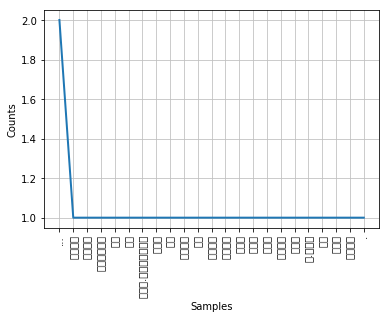

In [95]:
text.plot()

Empirical Law

Zipf's Law : 모든 단어에 대하여 조화평균이 들어가고, 자기의 순위에 반비례의 법칙, 밸런스가 맞고 편향적임을 검사할수 있음, 누가 중요한지에 대해 알려줄 수 있음, 어떤 feature을 할 건가 정해줌

In [116]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(3)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)

0.08333333333333333
0.041666666666666664
0.041666666666666664
0.16666666666666666


In [110]:
import matplotlib.pyplot

SyntaxError: invalid syntax (<ipython-input-110-832f312c6a13>, line 2)

In [128]:
text

<Text: 제약·바이오업계 숙원인 ‘ 첨단 재생의료 및 첨단 바이오의약품의...>

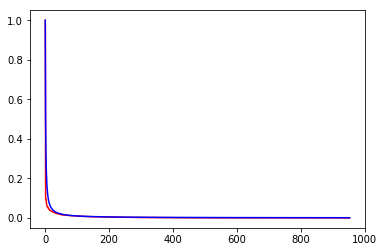

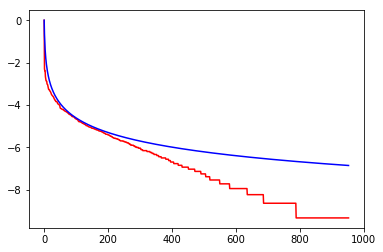

In [142]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key = lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]
plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()

plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

중요도 주변의 단어들이 굉장히 중요하다.

#### Heaps' Law 
- 실제로 feature로 삼아야하는 것은 몇개 안된다.(중복이 있기 때문에)

In [143]:
K = 10 # 10 - 100
B = 0.4 # 0.4 - 0.6
unique = list()
total = list()
heaps = list()
largeText =""
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)

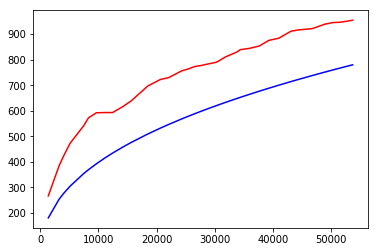

In [144]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

### n-gram
어간이라는 걸 찾기위해 좋은 모델 중 하나 <br>
특정한 시퀀스를 가져서 하나의 문장, 구, 절을 생성할 것인데, 어케 생성하고 찾을 것인가에 대한 모델 <br>
확률을 통해서 다음 글자가 뭘 지 확률 적으로 예측함. <br>
corpus : 밸런스와 다양한 언어패턴이 있어야함. (편향되지 않도록 다양하게 수집해야함.) <br>


In [166]:
sentence = "Life is too short, You need Python"

def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram
eojeol(sentence,3)
umjeol(sentence)

[('L', 'i'),
 ('i', 'f'),
 ('f', 'e'),
 ('e', ' '),
 (' ', 'i'),
 ('i', 's'),
 ('s', ' '),
 (' ', 't'),
 ('t', 'o'),
 ('o', 'o'),
 ('o', ' '),
 (' ', 's'),
 ('s', 'h'),
 ('h', 'o'),
 ('o', 'r'),
 ('r', 't'),
 ('t', ','),
 (',', ' '),
 (' ', 'Y'),
 ('Y', 'o'),
 ('o', 'u'),
 ('u', ' '),
 (' ', 'n'),
 ('n', 'e'),
 ('e', 'e'),
 ('e', 'd'),
 ('d', ' '),
 (' ', 'P'),
 ('P', 'y'),
 ('y', 't'),
 ('t', 'h'),
 ('h', 'o'),
 ('o', 'n')]

In [163]:
from collections import defaultdict

freq = defaultdict(int)
for _ in eojeol(corpus[0]):
    print(_)
    freq[_] += 1

('17일', '“')
('“', '자사고')
('자사고', '유효기간')
('유효기간', '끝나')
('끝나', '”')
('”', '재차')
('재차', '비판')
('비판', '국가교육회의가')
('국가교육회의가', '‘')
('‘', '일괄')
('일괄', '폐지')
('폐지', '’')
('’', '공론화해야')
('공론화해야', '제안')
('제안', '조희연')
('조희연', '서울시교육감이')
('서울시교육감이', '17일')
('17일', '교육청에서')
('교육청에서', '기자간담회를')
('기자간담회를', '열고')
('열고', '‘')
('‘', '일반고')
('일반고', '전환')
('전환', '자사고에')
('자사고에', '대한')
('대한', '동반성장')
('동반성장', '지원')
('지원', '방안을')
('방안을', '포함한')
('포함한', '일반고')
('일반고', '종합')
('종합', '지원')
('지원', '계획')
('계획', '’')
('’', '을')
('을', '발표하고')
('발표하고', '있다')
('있다', '.')
('.', '홍윤기')
('홍윤기', '인턴기자')
('인턴기자', '최근')
('최근', '서울')
('서울', '시내')
('시내', '8개')
('8개', '자율형사립고')
('자율형사립고', '(')
('(', '자사고')
('자사고', ')')
(')', '에')
('에', '대해')
('대해', '재지정')
('재지정', '취소를')
('취소를', '결정한')
('결정한', '조희연')
('조희연', '서울시교육감이')
('서울시교육감이', '“')
('“', '폐쇄적인')
('폐쇄적인', '교육과정의')
('교육과정의', '자사고는')
('자사고는', '유효기간이')
('유효기간이', '끝났다')
('끝났다', '”')
('”', '며')
('며', '기존의')
('기존의', '‘')
('‘', '자사고')
('자사고', '폐지')
('폐지', '’')
('’', '입장을')
('입

In [164]:
sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10]

[(('”', '며'), 4),
 (('있다', '”'), 4),
 (('”', '고'), 4),
 (('폐지', '’'), 3),
 (('‘', '일반고'), 3),
 (('‘', '자사고'), 3),
 (('조', '교육감은'), 3),
 (('조희연', '서울시교육감이'), 2),
 (('일반고', '전환'), 2),
 (('포함한', '일반고'), 2)]

In [165]:
freq[('채널에서', '한국일보를')]/sum(freq.values())*freq[('한국일보를','구독하세요')]/freq[('채널에서','한국일보를')]

0.0024752475247524753

## WPM
어간을 어떻게 추측할지에 대한 분리하는 모델, 구글에서 1억개 이상의 단어를 이를 통해 찾음

BPE (Byte Pair Encoding)을 통해 만들어볼것 <br>
생김새가 비슷한데 많이 나오는 얘들을 찾을 것.

### 불형어

In [167]:
from nltk.corpus import stopwords

In [170]:
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [169]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### BPE

In [201]:
tokens = {
    "l o w </w>":5,
    "l o w e s t </w>":2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
}

In [212]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [248]:
def retNewTokens(ngram, tokens, k):
    maxkey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxkey), "".join(maxkey), token) if maxValue>k else token] = freq
    #print(maxkey)
    return newTokens    

In [199]:
tokens = newTokens

In [200]:
print(newTokens)

{'low </w>': 5, 'low e s t </w>': 2, 'ne w er</w>': 6, 'r i d er</w>': 3}


In [203]:
maxkey = max(ngram, key=ngram.get)

In [204]:
maxkey

('e', 'r')

In [254]:
tokens = {
    "l o w </w>":5,
    "l o w e s t </w>":2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
}
tokens = {
    "아 버 지 가 </w>":5,
    "아 버 지 께 서 </w>":2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3
}
k = max(tokens.values())
for _ in range(100):
    maxkey = findBigram(tokens)
    tokens = retNewTokens(maxkey, tokens, k)

pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "</w>"])
    #print([_ for _ in re.findall(pattern, _) if _ != "</w>"])
print(set(result))

{'아버지'}
